# Algoritmoen Konplexutasuna eta Notazio Asintotikoa

<img src="../img/konplexutasuna.jpg" alt="Konplexutasuna" style="width: 600px;"/>

# Algoritmoen Konplexutasuna eta Notazio Asintotikoa

* Problema bat algoritmo ezberdinekin ebatzi daitezke
* Zeren araberea aukeratuko dugu?
   * Ulergarritasuna
   * Inplementatzeko erreztasuna
   * Exekutatzeko behar duen denbora
      * **Denbora Konplexutasuna**
   * Exekutatzeko behar duen memoria
      * **Espazio Konplexutasuna**

&rarr;  Gai honetan **Denbora Konplexutasuna** aztertuko dugu.

## Denbora Konplexutasunaren azterketa enpirikoa

* Algoritmo ezberdinen exekuzio denborak neurtu

<center><img src="../img/cronometro.jpg" alt="Konplexutasuna" style="width: 300px;"/></center>

### Adibide bat: Ordenazio algoritmoa

* Oinarria: Zerrenda bat ordenatua dago, ondoz-ondoko elementu guztiak ordenatuak badaude

In [45]:
def isOrdered(z):
    return all(z[i]<=z[i+1] for i in range(len(z)-1))

In [46]:
isOrdered([1,2,3,4,5,6,7,8,9,10])

True

In [47]:
isOrdered([1,2,3,4,6,5,7,8,9,10])

False

### Algoritmo zoro bat: Suffle-Sort

1. Zerrendako elementuak nahastu.
1. Zerrenda ordenatua badago, **AMAITU**
1. Jauzi **1**-era

In [117]:
from random import shuffle
def shuffleSort(z):
    i = 0
    while not isOrdered(z):
        i += 1
        #print(i,'-->',*z)
        shuffle(z)
    #print(i)

Algoritmoa badabil...

In [118]:
z = [2,1,4,3,5,7,6]
shuffleSort(z)
print(z)

[1, 2, 3, 4, 5, 6, 7]


### Exekuzio denbora neurtzen I - notebook-eko `%timit`

* https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit
* `%timit sententzia` &rarr; sententzia exekutatzeko behar den denbora neurtu
* Defektuz, exekuzio asko egingo ditu, denboraren batazbestekoa eta desbiderapena pantailatik idatziz

In [54]:
print('Neurketa hastera doa')
%timeit sum(range(100000))
print('Amaitu da:')

Neurketa hastera doa
2.08 ms ± 153 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Amaitu da:


Algoritmo zoroaren exekuzio denboraren neurketa...

In [123]:
z = [2,1,4,3,5,7,6]
%timeit shuffleSort(z)

2.84 µs ± 98.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


&rarr; nahiko bizkorra dirudi....

&rarr; **bizkorregia**

* `%timit -n int -r int sententzia` &rarr; _loops_ eta _runs_ aukeratu

In [124]:
z = [2,1,4,3,5,7,6]
%timeit -n 1 -r 1 shuffleSort(z)

183 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


* x µs &rarr; x ms ????

* zerbait txarto dabil...

Eta 2 *run* egiten baditugu?

In [125]:
z = [2,1,4,3,5,7,6]
%timeit -n 1 -r 2 shuffleSort(z)

The slowest run took 3552.94 times longer than the fastest. This could mean that an intermediate result is being cached.
6.13 ms ± 6.13 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)


* `%timeit`-aren lehenengo exekuzioak zerrenda ordenatzen du
* Bigarrenetik aurrera ordenatua dago
```python
z = [2,1,4,3,5,7,6]
%timeit shuffleSort(z)
```
* Ez dugu denbora ongi neurtzen `-n 1 -r 1` jartzen ez badugu

### Exekuzio denbora neurtzen II - notebook-eko `%%timit`

* https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit
* `%%timit` zeldako lehen agindua &rarr; zelda osoa exekutatzeko behar den denbora neurtu

In [126]:
%%timeit -n 2 -r 3
print('Neurketa hastera doa')
sum(range(100000))
print('Amaitu da:')

Neurketa hastera doa
Amaitu da:
Neurketa hastera doa
Amaitu da:
Neurketa hastera doa
Amaitu da:
Neurketa hastera doa
Amaitu da:
Neurketa hastera doa
Amaitu da:
Neurketa hastera doa
Amaitu da:
1.9 ms ± 18.7 µs per loop (mean ± std. dev. of 3 runs, 2 loops each)


Orain ez gara arduratu behar _loops_ eta _runs_ aukeratzeaz

In [127]:
%%timeit
z = [2,1,4,3,5,7,6]
shuffleSort(z)

54.4 ms ± 9.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


&rarr; Neurtzen ari garen denboran, zerrendaren sorrera bere barne du

In [128]:
%%timeit
z = [2,1,4,3,5,7,6]

149 ns ± 1.2 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


&rarr; guztiz arbuiagarria da

### Exekuzio denbora neurtzen III - `timit` modulua

* https://docs.python.org/3.8/library/timeit.html
* `timeit.timeit(stmt='pass', setup='pass', timer=<default timer>, number=1000000, globals=None)`
   * `stmt` sententziaren `number` exekuzioek behar duten denbora
* `timeit.repeat(stmt='pass', setup='pass', timer=<default timer>, repeat=5, number=1000000, globals=None)`
   * `stmt` sententziaren `number` exekuzioek behar duten denbora `repeat` aldiz

In [129]:
import timeit
timeit.timeit('sum(range(100000))',number=1000)

1.87910469295457

In [130]:
timeit.repeat('sum(range(100000))',number=100, repeat=10)

[0.1845613829791546,
 0.1835613469593227,
 0.18896639999002218,
 0.18339652987197042,
 0.18338739220052958,
 0.1832624259404838,
 0.18339323299005628,
 0.18333898205310106,
 0.18331931391730905,
 0.1833001160994172]

&rarr; Saiatu gintezke `%%timit` moduko bat sortzen, edozein lekutan erabiltzeko.

In [71]:
# prints a timing msg such as:
# 66.2 ns ± 0.104 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
def mytimeit(stmt='pass',loops=100,runs=7,setup='pass',globals=None):
    z = timeit.repeat(stmt=stmt,number=loops,repeat=runs,setup=setup,globals=globals)
    z = [x/loops for x in z]
    mean = sum(z)/runs
    std = (sum((x-mean)**2 for x in z)/(runs-1))**0.5 if runs>1 else 0.0
    if mean >= 1.0 :
        unit = 's'
    elif mean >= 1e-3 :
        unit = 'ms'
        mean *= 1e3
        std *= 1e3
    elif mean >= 1e-6 :
        unit = 'µs'
        mean *= 1e6
        std *= 1e6
    else :
        unit = 'ns'
        mean *= 1e9
        std *= 1e9
    #print(f'{mean} {unit} ± {std} {unit} per loop (mean ± std. dev. of {runs} runs, {loops} loops each)')
    print(f'{mean:.2f} {unit} ± {std:.2f} {unit} per loop (mean ± std. dev. of {runs} runs, {loops} loops each)')

In [72]:
mytimeit('sum(range(100000))')
%timeit sum(range(100000))

2.23 ms ± 0.01 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.06 ms ± 74.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Lerro anitzetako kodea neurtzeko:

In [73]:
stmt='''
b = 0
for i in range(100000):
    b += i
'''

mytimeit(stmt=stmt)

8.93 ms ± 0.30 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Saia gitezke algoritmo zoroa neurtzen...

In [75]:
stmt='''
z = [2,1,4,3,5,7,6]
shuffleSort(z)
'''

# Errorea gertatuko da, timit moduluak beste ingurune batetan exekutatzen
# duelako kodea, eta beraz shuffleSort funtzioa ez dago definitua
#mytimeit(stmt=stmt)

* `globals` argumentuari `globals()` builtin funtzioaren emaitza pasa.
* https://docs.python.org/3/library/functions.html#globals

In [ ]:
%%timeit
z = [2,1,4,3,5,7,6]
shuffleSort(z)

In [77]:
#globals()

In [78]:
stmt='''
z = [2,1,4,3,5,7,6]
shuffleSort(z)
'''

mytimeit(stmt=stmt,loops=20,globals=globals())

52.83 ms ± 13.67 ms per loop (mean ± std. dev. of 7 runs, 20 loops each)


Eta zerrenden `sort` funtzioarekin konparatzen badugu?

In [79]:
%%timeit
z = [2,1,4,3,5,7,6]
z.sort()

324 ns ± 4.64 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [80]:
stmt='''
z = [2,1,4,3,5,7,6]
z.sort()
'''

mytimeit(stmt=stmt,globals=globals(),loops=1000000)

322.35 ns ± 2.22 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [81]:
stmt='''
z = [2,1,4,3,5,7,6]
z.sort()
'''

mytimeit(stmt=stmt,loops=1000000,runs=7,globals=globals())

325.41 ns ± 2.34 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Gure ordenazio algoritmo zoroaren eta python-eko `sort`-aren arteko ezberdintasuna ikaragarri handituko da **zerrendaren tamaina luzatu ahala**...

In [82]:
for i in range(1,11):
    print('---',i,'---')
    z = list(range(i))
    shuffle(z)
    mytimeit('shuffleSort(z)',loops=1,runs=1,globals=globals())

--- 1 ---
5.98 µs ± 0.00 µs per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 2 ---
4.30 µs ± 0.00 µs per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 3 ---
41.23 µs ± 0.00 µs per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 4 ---
13.26 µs ± 0.00 µs per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 5 ---
3.88 ms ± 0.00 ms per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 6 ---
2.79 ms ± 0.00 ms per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 7 ---
12.65 ms ± 0.00 ms per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 8 ---
20.20 ms ± 0.00 ms per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 9 ---
1.27 s ± 0.00 s per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 10 ---
59.73 s ± 0.00 s per loop (mean ± std. dev. of 1 runs, 1 loops each)


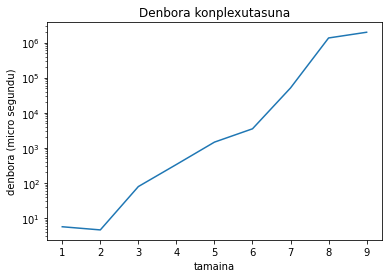

In [84]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [5.65, 4.59, 79.03, 336.80, 1460, 3500, 51230, 1360000, 1980000]

plt.plot(x, y)
plt.xlabel("tamaina")
plt.ylabel("denbora (micro segundu)")
plt.title("Denbora konplexutasuna")
plt.yscale('log')
plt.show()

In [86]:
for i in range(1,100):
    print('---',i,'---')
    z = list(range(i))
    shuffle(z)
    mytimeit('z.sort()',loops=1,runs=1,globals=globals())

--- 1 ---
1.74 µs ± 0.00 µs per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 2 ---
1.57 µs ± 0.00 µs per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 3 ---
1.26 µs ± 0.00 µs per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 4 ---
1.38 µs ± 0.00 µs per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 5 ---
1.39 µs ± 0.00 µs per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 6 ---
1.28 µs ± 0.00 µs per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 7 ---
1.35 µs ± 0.00 µs per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 8 ---
1.50 µs ± 0.00 µs per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 9 ---
1.45 µs ± 0.00 µs per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 10 ---
1.48 µs ± 0.00 µs per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 11 ---
1.51 µs ± 0.00 µs per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 12 ---
1.59 µs ± 0.00 µs per loop (mean ± std. dev. of 1 runs, 1 loops each)
--- 13 ---
1.94 µs ± 0.00 µs per loop

### Hiztegien indexazioa vs zeharkatzea

In [87]:
def f1(h):
    b = 0
    for k in h:
        b += k*h[k]
    return b

def f2(h):
    b = 0
    for k,v in h.items():
        b += k*v
    return b

def f3(h):
    return sum(k*v for k,v in h.items())

h = {i:i for i in range(10_000)}
print(f1(h),f2(h),f3(h))

333283335000 333283335000 333283335000


In [88]:
%timeit f1(h)
%timeit f2(h)
%timeit f3(h)

1.55 ms ± 80.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.4 ms ± 17.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.3 ms ± 36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Hiztegien indexazioa vs zeharkatzea II

In [94]:
def f1(h):
    b = 0
    for k in h:
        b += len(k)*h[k]
    return b

def f2(h):
    b = 0
    for k,v in h.items():
        b += len(k)*v
    return b

def f3(h):
    return sum(len(k)*v for k,v in h.items())

h = {str(i):i for i in range(1,10000)}
print(f1(h),f2(h),f3(h))

199475505 199475505 199475505


In [95]:
%timeit f1(h)
%timeit f2(h)
%timeit f3(h)

2.35 ms ± 48.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.13 ms ± 4.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.1 ms ± 39.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Denbora Konplexutasunaren azterketa teorikoa

* Algoritmo ezberdinen exekuzio denborak **estimatu**

<center><img src="../img/guessing.gif" alt="Konplexutasuna" style="width: 300px;"/></center>

### Adibide bat: $n^2$ kalkulkatzen

* Berreketa eragiketa existituko ez balitz...

* Hiru algoritmo ezberdin aztertuko ditugu:

<center><img src="../img/Konplexutasuna-taula-1.png" alt="Konplexutasuna"/></center>

<!--
<table>
<thead><tr><th><center>Biderkadura</center></th><th><center>Batura</center></th><th><center>Inkrementua</center></th></tr></thead>
<tbody><tr>
<td><code>result=n*n</code></td>
<td><code>result = 0
for i in range(n):
    result += n</code></td>
<td><code>result = 0
for i in range(n):
    for j in range(n):
        result += 1</code></td>
</tr></tbody>
</table>
-->

* Oraingoz, analisia errazteko:

<center><img src="../img/Konplexutasuna-taula-2.png" alt="Konplexutasuna"/></center>

<!--
<table>
<thead><tr><th><center>Biderkadura</center></th><th><center>Batura</center></th><th><center>Inkrementua</center></th></tr></thead>
<tbody><tr>
<td><code>result=n*n</code></td>
<td><code>result = 0
i = 0
while i &lt; n :
    result += n
    i += 1</code></td>
<td><code>result = 0
i = 0
while i &lt; n :
    j = 0
    while j &lt; n :
        result += 1
        j += 1
    i += 1</code></td>
</tr></tbody>
</table>
-->

* **Biderkaduran** oinarritutako algoritmoa

<center><img src="../img/Konplexutasuna-taula-3.png" alt="Konplexutasuna"/></center>

<!--
<table>
<thead><tr><th><center>Kodea</center></th><th><center>Eragiketa kopurua</center></tr></thead>
<tbody><tr>
<td><code>result=n*n</code></td>
<td><code>&rarr; 1 biderkaketa + 1 esleipen</code></td>
</tr></tbody>
</table>
-->

* **Baturan** oinarritutako algoritmoa

<center><img src="../img/Konplexutasuna-taula-4.png" alt="Konplexutasuna"/></center>

<!--
<table>
<thead><tr><th><center>Kodea</center></th><th><center>Eragiketa kopurua</center></tr></thead>
<tbody><tr>
<td><code>result = 0
i = 0
while i &lt; n :
    result += n
    i += 1</code></td>
<td><code>&rarr; 1 esleipen
&rarr; 1 esleipen
&rarr; (n+1) &bull; (1 konparaketa)
&rarr; n &bull; (1 batura + 1 esleipen)
&rarr; n &bull; (1 inkrementu)</code></td>
</tr></tbody>
</table>
-->

* **Inkrementuan** oinarritutako algoritmoa

<center><img src="../img/Konplexutasuna-taula-5.png" alt="Konplexutasuna"/></center>

<!--
<table>
<thead><tr><th><center>Kodea</center></th><th><center>Eragiketa kopurua</center></tr></thead>
<tbody><tr>
<td><code>result = 0
i = 0
while i &lt; n :
    j = 0
    while j &lt; n :
        result += 1
        j += 1
    i += 1</code></td>
<td><code>&rarr; 1 esleipen
&rarr; 1 esleipen
&rarr; (n+1) &bull; (1 konparaketa)
&rarr; n &bull; (1 esleipen)
&rarr; n &bull; (n+1) &bull; (1 konparaketa)
&rarr; n &bull; n &bull;  (1 inkrementu)
&rarr; n &bull; n &bull; (1 inkrementu)
&rarr; n &bull; (1 inkrementu)</code></td>
</tr></tbody>
</table>
-->

Demagun oinarrizko eragiketa bakoitzak ondoko denborak behar dituela :

|  Biderkadura  |  Batura  |   Inkrementua  |  Esleipena  |  Konparaketa  |
|:--------:|:--------:|:--------:|:---------:|:--------:|
|  342$\mu s$  |  31$\mu s$  |   1$\mu s$  |  1$\mu s$  |  1$\mu s$  |


Orduan,

|  Algoritmoa   |  Bider.   |  Batura   |   Inkr.        |  Esleip.    |  Konpa.          |  Denbora $\mu s$  |
| :------------ | :------:  | :------:  | :------:       | :-------:   | :------:         | :--------------:  |
|  Biderkadura  | $\tiny 1$ |           |                | $\tiny 1$   |                  | $\tiny 343$       |
|  Batura       |           | $\tiny n$ | $\tiny n$      | $\tiny n+2$ | $\tiny n+1$      | $\tiny 34n+3$     |
|  Inkrementua  |           |           | $\tiny 2n^2+n$ | $\tiny n+2$ | $\tiny n^2+2n+1$ | $\tiny 3n^2+4n+3$ |


|  Algoritmoa   |  Bider.  |  Batura  |   Inkr.  |  Esleip.  |  Konpa.  |  Denbora $\mu s$ |
|:--------------|:--------:|:--------:|:--------:|:---------:|:--------:|----------:|
|  Biderkadura  |    $\tiny 1$   |          |          |    $\tiny 1$    |          |   $\tiny 343$   |
|  Batura       |          |    $\tiny n$   |    $\tiny n$   |  $\tiny n+2$    |  $\tiny n+1$   | $\tiny 34n+3$   |
|  Inkrementua  |          |          | $\tiny 2n^2+n$ |  $\tiny n+2$    | $\tiny n^2+2n+1$ | $\tiny 3n^2+4n+3$ |


<center><img src="../img/Berreketa.png" alt="Konplexutasuna"/></center>

Oinarrizko eragiketen exekuzio denborak edozein direlarik ere:

|  Biderkadura  |  Batura  |   Inkrementua  |  Esleipena  |  Konparaketa  |
|:--------:|:--------:|:--------:|:---------:|:--------:|
|  $c_1$  |  $c_2$  |   $c_3$  |  $c_4$  |  $c_5$  |



|  Algoritmoa   |  Bider.  |  Batura  |   Inkr.  |  Esleip.  |  Konpa.  |
|:--------------|:--------:|:--------:|:--------:|:---------:|:--------:|
|  Biderkadura  |    $\tiny 1$   |          |          |    $\tiny 1$    |          | 
|  Batura       |          |    $\tiny n$   |    $\tiny n$   |  $\tiny n+2$    |  $\tiny n+1$   |
|  Inkrementua  |          |          | $\tiny 2n^2+n$ |  $\tiny n+2$    | $\tiny n^2+2n+1$ |

* Biderkadura: $c_1 + c_4$ 
* Batura: $(c_2 + c_3 + c_4 +c_5) \cdot n + (2c_4 + c_5)$
* Inkrementua: $(2c_3+c_5) \cdot n^2 + (c_3 + c_4 + 2c_5) \cdot n + (2c_4+c_5)$

* Biderkadura: $c_1 + c_2$ 
* Batura: $(c_2 + c_3 + c_4 +c_5) \cdot n + (2c_4 + c_5)$
* Inkrementua: $(2c_3+c_5) \cdot n^2 + (c_3 + c_4 + 2c_5) \cdot n + (2c_4+c_5)$

Konstante berriak definituz:

* Biderkadura: $k_1$ 
* Batura: $k_2 n + k_3 $
* Inkrementua: $k_4 n^2 + k_5 n + k_6$

Berdin dio $k_1 \dots k_6$ konstanteen balioa zein den, n-ren tamaina handitu ahala:
* Biderkadura algoritmoak $k_1$ koste **konstantea** izango du
    * n handitu arren, denbora ez da aldatuko.
* Batura algoritmoak $k_2 n + k_3$ koste **lineala** izango du
    * n bikoiztean, denbora ere bikoiztu egingo da.
* Inkrementu algoritmoak $k_4 n^2 + k_5 n + k_6$ koste **kuadratikoa** izango du
    * n bikoiztu &rarr; denbora laukoiztu
    * n x 10 &rarr; t x 100
    * n x 100 &rarr; t x 10.000
    * n x 1000 &rarr; t x 1.000.000
    * ...
    


### Denbora Konplexutasunaren azterketa teorikoa:


<p><center><em>Algoritmo baten exekuzio denborak problemaren tamainarekiko izango duen konportamolde asintotikoa</em></center></p>


* Problemaren Tamaina:
    * $n^2$ kalkulatzean, n
    * Zerrenda bat ordenatzerakoan, zerrendaren luzera
    * ...
* Batzuetan tamaina bat baina gehiago egon daiteke
    * Matrize batetako elementu maximoan, ilara eta zutabe kopurua
    * ...

## Eragiketetatik pausuetara: azterketa teorikoa sinplifikatzen


<center><img src="../img/Pausuak.png" alt="Konplexutasuna" style="width: 600px;"/></center>

* Aurreko adibideetan, exekuzio denbora oinarrizko eragiketetan neurtu dugu
    * Esleipena, Batura, Konparaketa, Inkrementua...
* Amaieran, eragiketa ezberdinen denbora koefizienteak konbinatu egin ditugu:
    * $(2c_3+c_5) \cdot n^2 + (c_3 + c_4 + 2c_5) \cdot n + (2c_4+c_5)$ &rarr; $k_4 n^2 + k_5 n + k_6$
* Halako konbinaketak haseratik egin ditzakegu, notazioa errazteko:
    * $k$ &rarr; pausuak/urratsak

### Pausua/urratsa

* Denbora konstante batetan exekutatuko den eragiketa multzoa
    * batura &rarr; pausu 1
    * 2 batura &rarr; pausu 1
    * 10.000 batura &rarr; pausu 1
    * ...
    * batura + esleipena &rarr; pausu 1
    * 2 x (batura + esleipena) &rarr; pausu 1
    * 10.000 x (batura + esleipena ) &rarr; pausu 1
    * ...

&rarr; **Problemaren tamainarekiko menpekotasunik ez duen eragiketa multzoa**    

<center><img src="../img/Pausuak2.png" alt="Konplexutasuna" /></center>

<!--
<table>
<thead><tr><th><center>Kodea</center></th><th><center>Pausu kopurua</center></tr></thead>
<tbody><tr>
<td><code>result = 0
i = 0
while i &lt; n :
    j = 0
    while j &lt; n :
        result += 1
        j += 1
    i += 1</code></td>
<td><code>
</tr></tbody>
</table>

-->

<center><img src="../img/Pausuak3.png" alt="Konplexutasuna" /></center>

&rarr; **Pausu Kopurua:** $t(n) = n^2+n+1$  

**Algoritmo originaleetara bueltatuz:**

<img src="../img/Konplexutasuna-taula-1.png" alt="Konplexutasuna"/>

* `range(n)` &rarr; 1 pausu
* `for i in range(n)` &rarr; n x 1 pausu

* Biderkadura: &nbsp; $t(n) = 1$
* Batura: &nbsp; $t(n) = n + 1$
* Inkrementua: &nbsp; $t(n) = n^2+n+1$

### Hiru algoritmoen pausu kopuruak:

* Biderkadura: &nbsp; $t(n) = 1$
* Batura: &nbsp; $t(n) = n+1$
* Inkrementua: &nbsp; $t(n) = n^2+n+1$

* Pausuak **edozein** direlarik ere:
    * $\exists \; n_a , \forall n \ge n_a$ Batura Inkrementua baina bizkorragoa den.
    * $\exists \; n_b , \forall n \ge n_b$ Biderkadura Batura baina bizkorragoa den.
    

## Kasu On, Txar eta Batazbestekoa 
<br/>
<br/>

<center><img src="../img/GoodUglyBad.jpg" alt="GoodUglyBasd" /></center>


Algoritmo batek emango dituen pausu kopuruak, problemaren tamaina konstante mantenduta ere, ebazten duen **kasu zehatzaren** araberakoa izan daiteke:

* `if` kontrol egitura
    * Aurrez ez dakigu egia izango ote den
    * batzuetan exekutatu, besteetan ez.
* `while` kontrol egitura
    * Aurrez ez dakigu zenbat aldiz exekutatuko ote den
    * batzuetan askotan exekutatu, besteetan gutxitan

#### Adibide bat: zerrenda batetan balio baten agerpen kopurua kalkulatu

In [ ]:
def kontatu(z,x):
    k = 0
    for y in z:
        if x == y :
            k += 1
    return k

* Problemaren tamaina: $n = len(z)$

* `x` $\ne$ `y` &rarr; 1 pausu
* `x` $=$ `y` &rarr; 2 pausu &rarr; 1 pausu


* $t(n) = n + 1$

#### Adibide bat: zerrenda batetan balio baten lehen agerpenaren posizioa, edo `None`

In [ ]:
def topatu(z,x):
    for i,y in enumerate(z):
        if x == y :
            return i
    return None

* Problemaren tamaina: $n = len(z)$

* `x` $\ne$ `y` &rarr; 1 pausu
* `x` $=$ `y` &rarr; 1 pausu eta *AMAITU*

* $t(n) = ???$
    * Funtzioak jasotzen duen **zerrenda zehatzaren** araberakoa 

#### I - Kasu Ona (*El Bueno*)

```python
def topatu(z,x):
    for i,y in enumerate(z):
        if x == y :
            return i
    return None
```

* Problemaren tamaina **EDOZEIN** delarik ere, izan dezakegun adibiderik bizkorrena.
    * Zerrendaren tamaina 0 dela esateak ez du balio.

* Elementua zerrendaren lehenengo posizioan topatzea.

* $t(n) = 1$

#### II - Kasu Txarra (*El Malo*)

```python
def topatu(z,x):
    for i,y in enumerate(z):
        if x == y :
            return i
    return None
```

* Problemaren tamaina **EDOZEIN** delarik ere, izan dezakegun adibiderik motelena.

* Elementua zerrendan ez egotea.

* $t(n) = n+1$

#### III - Batazbesteko Kasua (*El Feo*)

```python
def topatu(z,x):
    for i,y in enumerate(z):
        if x == y :
            return i
    return None
```

* Problemaren tamaina **EDOZEIN** delarik ere, *batazbestean* emango dugun pausu kopurua.


* Batazbestekoa kalkulatu ahal izateko, posible diren kasuen gaineko probabilitate banaketa bat definitu beharko genuke eta ondoren kasu bakoitzaren pausu kopurua bere probabilitatearekin pixatu eta batu.
    * Edo integratu, kasu espazioa jarraia balitz

* Horrexegatik esleitu diogu *El Feo* pertsonaia...

#### III - Batazbesteko Kasua (*El Feo*) kalkulatzen...

```python
def topatu(z,x):
    for i,y in enumerate(z):
        if x == y :
            return i
    return None
```

* Demagun $n$ luzerako zerrenda batetan elementu bat edozein posiziotan topatzeko edo zerrendan ez egoteko probabilitatea berdina dela, hau da, $1/(n+1)$.

* $j$ posizioan dagoen elementua &rarr; $t_j(n)=j+1$ pausu

* Zerrendan ez dagoen elementua &rarr; $t_{None}(n)=n+1$ pausu

* $j$ posizioan &rarr; $prob(j)=1/(n+1) \;\; , \;\;t_j(n)=j+1$
* ez badago &rarr; $prob(None)=1/(n+1) \;\; , \;\;t_{None}(n)=n+1$

$$t(n) = \sum_{k \in kasuak}{prob(k) \cdot t_k(n)} = \left(\sum_{j=0}^{j=n-1}{\frac{1}{n+1} \cdot (j+1)} \right) + \frac{1}{n+1} \cdot (n+1)$$ 

$$= \left(\frac{1}{n+1} \sum_{i=1}^{i=n}{i}\right) + 1 = \frac{n}{2}+1$$ 

## Konplexutasun Polinomiko eta Ez Polinomikoak 
<br/>
<br/>


<center><img src="../img/Konplexutasuna-polinomioak.png" alt="Konplexutasun ez polinomikoak" /></center>


* `for` kontrol egiturek, **ASKOTAN**, pausu kopuru polinomikoak suposatzen dituzte

* $t(n)=n$ :
```python
for i in range(n):
    pausu 1
```

* $t(n)=n^2$ :
```python
for i in range(n):
    for j in range(n):
        pausu 1
```

* $t(n)=n^3$ :
```python
for i in range(n):
    for j in range(n):
        for k in range(n):
            pausu 1
```

* Indizeak erabiltzen dituzten `for` kontrol egitura *garbietan* (`return/break` ez dutenak), pausu kopurua batukarien bidez nahiko erraz adierazi daiteke

* `for i in range(n)` $\equiv$ `for i in range(0,n)` &rarr; $\sum_{i=0}^{n-1}$

* `for j in range(i,n)` &rarr; $\sum_{j=i}^{n-1}$

* Kontuan izan gainera:

$$\sum_{i=a}^{b} 1 = \sum_{i=b}^{a} 1 = \max{(a,b)}-\min{(a,b)}+1$$
$$\sum_{i=1}^{n} i = \sum_{i=n}^{1} i = \frac{n \cdot (n+1)}{2}$$


<span style="display:block; margin-top:-20px;">
    
```python
for i in range(n):
    pausu 1
```

&emsp;&emsp; &rarr; &emsp; $t(n) = \sum_{i=0}^{n-1} 1 = n$

<span style="display:block; margin-top:-20px;">
    
```python
for i in range(n):
    for j in range(n):
        pausu 1
```

&emsp;&emsp; &rarr; &emsp; $t(n) = \sum_{i=0}^{n-1} \left( \sum_{j=0}^{n-1} 1 \right) = \sum_{i=0}^{n-1} n = n^2$

<span style="display:block; margin-top:-20px;">
    
```python
for i in range(n):
    for j in range(n):
        for k in range(n):
            pausu 1
```

&emsp;&emsp; &rarr; &emsp; $t(n) = \sum_{i=0}^{n-1} \left( \sum_{j=0}^{n-1} \left( \sum_{k=0}^{n-1} 1 \right) \right) = \sum_{i=0}^{n-1} \left( \sum_{j=0}^{n-1} n \right) = \sum_{i=0}^{n-1} n^2 = n^3$

**Adibide bat:** Zerrenda batetan, bi edozein elementuren biderkadura maximoa

```python
def kontatu(z):
    m = z[0]*z[1]
    for i in range(n-1):
        for j in range(i+1,n):
            x = z[i]*z[j]
            if x > m :
                m = x
    return m
```

$$t(n) = 1 + \sum_{i=0}^{n-2} \left( \sum_{j=i+1}^{n-1} 1 \right) = 1 + \sum_{i=0}^{n-2} (n-1-i)$$

$$ \overset{k=n-1-i}{=\mathrel{\mkern-3mu}=} \;\;  1 + \sum_{k=n-1}^{1} k = 1 + \frac{(n-1) \cdot n}{2}  = \frac{n^2}{2} - \frac{n}{2} + 1$$

* `while` kontrol egiturek, **ASKOTAN**, kasu on eta txarrak sortzen dituzte.
* Pausu kopuruek ez dute zertan polinomikoak izan behar.

**Adibide bat:** $[1,n]$ arteko zenbaki arrunt bat asmatzen. Demagun funtzio bat dugula, `galdera(k)` zeinak zenbakia pentsatu duenari galdetzeko balio duen. Funtzioak `0` bueltatuko du asmatu badugu, `1` bilatzen ari garen zenbakia handiagoa bada edo `-1` txikiagoa bada.

* Problemaren tamaina: $n$

* `galdera(k)` : 1 pausu

* Ume oso txiki batek, halako zerbait egin lezake:
```python
from random import randrange 
def asmatu(n):
    x = galdera(randrange(1,n+1))
    while x:
        x = galdera(randrange(1,n+1)) 
    print('Asmatu dut zure zenbakia!')
```

* Kasu Ona (auzazki aukeratutako lehenengo zenbakia):  $t(n)=1$
* Kasu Txarra (ez du sekula topatuko?): $t(n)\overset{?}{=}\infty$
* Batazbesteko kasua: $t(n) = \sum_{k \in kasuak}{prob(k) \cdot t_k(n)} = ??$

* Estimazio enpirikoa:

In [ ]:
from random import random
n = 123
th = 1/n
N = 100000
b = 0
for i in range(N):
    k = 1
    while random()>th :
        k+= 1
    b += k
print(b/N)

* Kasu Ona (auzazki aukeratutako lehenengo zenbakia):  $t(n)=1$
* Kasu Txarra (ez du sekula topatuko?): $t(n)\overset{?}{=}\infty$
* Batazbesteko kasua: $t(n) = \sum_{k \in kasuak}{prob(k) \cdot t_k(n)} \overset{enp}{=} n$

<center><img src="../img/Ugly.jpg" alt="GoodUglyBasd" /></center>

* Umeak hobeto egiten ikas dezake:
```python
def asmatu(n):
    i = 1
    x = galdera(i)
    while x:
        i += 1
        x = galdera(i)
    print('Asmatu dut zure zenbakia!')
```

* Kasu Ona (lehenengo zenbakia): $t(n)=1$
* Kasu Txarra (azken zenbakia): $t(n)=n$
* Batazbesteko kasua: $t(n) = \sum_{i=1}^{n} (\frac{1}{n} \cdot i)= \frac{n+1}{2}$


* Adin batetik aurrera, honako hau egin beharko genuke:

In [ ]:
def asmatu(n):
    i,j = 1,n
    e = (i+j)//2
    x = galdera(e)
    while x :
        if x == 1 :
            i = e+1
        else :
            j = e-1
        e = (i+j)//2
        x = galdera(e)
    print('Asmatu dut zure zenbakia!')

* Kasu Ona (justu justu erdian!): &nbsp; $t(n)=1$
* Kasu Txarra (`i==j` egoerara iristean): &nbsp;  $t(n) = \; ???$
* Batazbesteko kasua: &nbsp; $t(n) = \; ???$

&rarr; Bitxia... bizkorragoa dela suposatzen dugu, baina ez gera gai zuzenean bere bizkortasuna adierazteko

* Iterazio bakoitza: 1 pausu &rarr; $t(n) = iterazio\_kopurua$
* Iterazio bakoitzean, bilaketa tartea erdira (apur bat txikiagoa) doa:

* Iterazio bat: $[i,j] \; \approx \frac{1}{2} [1,n]$

* 2 iterazio: $[i,j] \; \approx \frac{1}{4} [1,n]$

* $k$ iterazio: $[i,j] \; \approx \frac{1}{2^k} [1,n]$

* $i = j \iff 2^k = n $
* $k=\log_2 n\;$ iterazio izango dira

* Kasu Ona (erdian): $t(n)=1$
* Kasu Txarra (`i==j` egoerara iristean): $t(n) = \; \log_2 n$
* Batazbesteko kasua: $t(n) = \; \sum_{k \in kasuak}{prob(k) \cdot t_k(n)}$

* Batazbestekoa kalkulatzeko, kasu bakoitzaren probabilitatea aukeratu behar dugu.
* Demagun zenbaki guztiek probabilitate berdina dutela, $prob(k)=\frac{1}{n}$
* 1 pausu: 1 kasu (erdian egotea)
* 2 pausu: 2 kasu (erdi bakoitzetako erdian egotea)
* 3 pausu: 4 kasu (laurden bakoitzetako erdian egotea)
* ...
* $k$ pausu: $2^{k-1}$ kasu
* ...
* $k = \log_2 n$ pausu : $2^{k-1} = \frac{n}{2}$ kasu.


$$\small t(n) = \; \sum_{k \in kasuak}{prob(k) \cdot t_k(n)} = \frac{1}{n} \cdot \sum_{k \in kasuak}{t_k(n)} = \frac{1}{n} \cdot \left( \sum_{k=1}^{\log_2 n}{ 2^{k-1} \cdot k } \right) \overset{?}{\approx} \log_2 n$$

* $t(n)$-ren behe limite bat batukariaren azken terminoa da: $t(n) \ge \frac{1}{n} \cdot 2^{(\log_2 n)-1} \cdot \log_2 n = \frac{1}{2}\log_2 n$
* $t(n)$-ren goi limite bat kasu txarra da: $t(n) \le \log_2 n$

$$ \frac{1}{2} \log_2 n \le t(n) \le \log_2 n \;\;\; \to \;\;\; t(n) = \log_2 n$$


<center><img src="../img/Ugly.jpg" alt="GoodUglyBasd" /></center>

## Algoritmo Errekurtsiboak 
<br/>
<br/>

<center><img src="../img/recursion.png" alt="Algoritmo Errekurtsiboak" /></center>


Algoritmo errekurtsiboen pausu kopurua espresio errekurtsibo bat erabiliz adierazi ahal da.

In [ ]:
def faktoriala(n):
    if n < 2 :
        return 1
    else :
        return n * faktoriala(n-1)

$$
t(n) = 
  \begin{cases}
    1 & , & n<2\\
    1+t(n-1) & , & n \ge 2\\
\end{cases}
$$

Espresio errekurtsiboa garatu dezakegu:

$$ t(n) = 1 + t(n-1) = 2 + t(n-2) = 3 + t(n-3) = \ldots $$

$$= k + t(n-k)$$

Kasu basera iristeko behar den $k$ konstantea lortu behar dugu:

$$ n-k = 1 \iff k = n-1$$

Eta ordezkatu:

$$\boxed{\small t(n) = n - 1 + t(1) = n}$$

In [ ]:
def hanoi(a,b,n):
    if n == 1 :
        print(a,'-->',b)
    else :
        c = 6-a-b
        hanoi(a,c,n-1)
        print(a,'-->',b)
        hanoi(c,b,n-1)

$$
t(n) = 
  \begin{cases}
    1 & , & n=1\\
    1 + 2 \cdot t(n-1) & , & n > 1\\
\end{cases}
$$

$$t(n) = 1 + 2 \cdot t(n-1) = 3 + 4 \cdot t(n-2) = 7 + 8 \cdot t(n-3) = \ldots $$

$$= (2^k-1) + 2^k \cdot t(n-k)$$

$$n-k = 1 \iff k=n-1$$

$$t(n) = 2^{n-1} - 1 + 2^{n-1} \cdot 1$$

$$\boxed{t(n) = 2^n - 1}$$

&rarr; Bagenekien 2 eraztun 3 mugimendu zirela, 3 eraztun 7, 4 eraztun 15, 5 eraztun 31...

In [ ]:
def merge_sort(z):
    n = len(z)
    if n > 1 :
        a = z[:n//2]
        b = z[n//2:]
        merge_sort(a)
        merge_sort(b)
        z.clear()
        z.extend(merge(a,b))

In [ ]:
def merge_sort(z):
    n = len(z)
    if n == 1 :
        return z
    else :
        a = merge_sort(z[:n//2])
        b = merge_sort(z[n//2:])
        return merge(a,b)
        #return merge(merge_sort(z[:n//2]),merge_sort(z[n//2:]))

* `z[:n//2]` &rarr; $\frac{n}{2}$ pausu
* `z[n//2:]` &rarr; $\frac{n}{2}$ pausu
* `merge(a,b)` &rarr; $len(a)+len(b)=n$ pausu 

$$
t(n) = 
  \begin{cases}
    1 & , & n=1\\
    1 + 2 n + 2 \cdot t\left(\frac{n}{2}\right) & , & n > 1\\
\end{cases}
$$

$$\small{ t(n) = 1 + 2 n + 2 \cdot t\left(\frac{n}{2}\right) = 3 + 4n + 4 \cdot t\left(\frac{n}{4}\right) = 7 + 6n + 8 \cdot t\left(\frac{n}{8}\right) = \ldots }$$

$$\small{= (2^k-1) + k \cdot 2n+ 2^k \cdot t\left(\frac{n}{2^k}\right)}$$

$$\small \frac{n}{2^k} = 1 \iff k=\log_2 n$$

$$t(n) = (n-1) +  (\log_2 n) \cdot 2n + n \cdot 1 $$

$$\boxed{t(n) = 2n \cdot \log_2 n + 2n -1}$$

In [ ]:
def merge_sort(z):
    n = len(z)
    if n > 1 :
        a = z[:n//2]
        b = z[n//2:]
        merge_sort(a)
        merge_sort(b)
        z.clear()
        z.extend(merge(a,b))

In [ ]:
def fib(n):
    if n < 2 :
        return n
    else :
        return fib(n-1) + fib(n-2)

$$
t(n) = 
  \begin{cases}
    1 & , & n < 2\\
    1 + t(n-1) + t(n-2) & , & n \ge 2\\
\end{cases}
$$

$$\small{ t(n) = 1 + t(n-1) + t(n-2) = (1 + 1) + 2 \cdot t(n-2) + t(n-3)}$$

$$\small{= (1+1+2) + 3 \cdot t(n-3) + 2 \cdot t(n-4) = (1+1+2+3) + 5 \cdot t(n-4) + 3 \cdot t(n-5) }$$

$$\small{= (1+1+2+3+5) + 8 \cdot t(n-5) + 5 \cdot t(n-6)}$$

$$\small{ = \ldots = \left(1 + \sum_{i=1}^{k}{fib(i)}\right) + fib(k+1) \cdot t(n-k) + fib(k) \cdot t(n-(k+1))}$$

Errazagoa izango da goi/behe-borneak ezartzea:

$$
g(n) = 
  \begin{cases}
    1 & , & n < 2\\
    1 + 2 \cdot t(n-2) & , & n \ge 2\\
\end{cases}
$$

$$
h(n) = 
  \begin{cases}
    1 & , & n < 2\\
    1 + 2 \cdot t(n-1) & , & n \ge 2\\
\end{cases}
$$

$$g(h) < t(n) < h(n)$$

$$g(n) = 1 + 2 \cdot t(n-2) = 3 + 4 \cdot t(n-4) = \ldots = (2^k-1) + 2^k \cdot t(n-2k)$$

$$n-2k = 0 \iff k=\frac{n}{2}$$

$$g(n) = (2^{n/2}-1) + 2^{n/2} \cdot 1 = 2 \cdot \left(\sqrt{2}\right)^n - 1$$

$$h(n) = t_{hanoi}(n) = 2^n - 1$$

$$\boxed{ 2 \cdot \left(\sqrt{2}\right)^n - 1 \;<\; t(n) \;<\; 2^n - 1}$$

## Notazio Asintotikoa

* Algoritmo batek suposatzen dituen $t(n)$ pausu kopurua (kasu on eta kasu txarra) modu konpaktu batean adierazteko notazioa

<center><img src="../img/konplexutasuna.jpg" alt="Konplexutasuna" style="width: 600px;"/></center>

* **Goi Limitea** : *Kasu Txarra*

$$\small{O\left( f(n) \right) = \{ t : \mathbb{N} \to \mathbb{R}^+  \;\;:\;\; \exists c \in \mathbb{R}^+ \land \exists n_0 \in \mathbb{N} \;\;:\;\; \forall n \ge n_0 \;\; t(n) \le c \cdot f(n) \}}$$

$$t(n)=an+b \quad \to \quad t(n) \in O(n)$$

* **Behe Limitea** : *Kasu Ona*

$$\small{\Omega \left( f(n) \right) = \{ t : \mathbb{N} \to \mathbb{R}^+  \;\;:\;\; \exists c \in \mathbb{R}^+ \land \exists n_0 \in \mathbb{N} \;\;:\;\; \forall n \ge n_0 \;\; t(n) \ge c \cdot f(n) \}}$$

$$t(n)=an+b \quad \to \quad t(n) \in \Omega(n)$$

* **Magnitude Orden Zehatza** : *Kasu Txarra* $\equiv$ *Kasu Ona*

$$\small{\Theta \left( f(n) \right) = \{ t : \mathbb{N} \to \mathbb{R}^+  \;:\; \exists c,d \in \mathbb{R}^+ \land \exists n_0 \in \mathbb{N} \;:\; \forall n \ge n_0 \;  c \cdot f(n) \ge t(n) \ge d \cdot f(n) \}}$$

&rarr; $f(n)$ funtziorik sinpleenak erabiliko ditugu: $O(1) \;,\; O(n) \;,\; O(\log n)  \;,\; O(n^2) \ldots$

### Adibide batzuk

* $t(n) = 3n^2 - 4n + 17$ &nbsp; &rarr; &nbsp; $\Theta(n^2)$

* $t_{txarra}(n) = 4n + 2 \quad t_{ona}(n) = 117 $ &nbsp; &rarr; &nbsp; $O(n) \quad \Omega(1)$

* $t_{txarra}(n) = n^2 + n + 1 \quad t_{ona}(n) = n \cdot \log_2 n+ 1 $ &nbsp; &rarr; &nbsp; $O(n^2) \quad \Omega(n \cdot \log n)$

### Konplexutasun mailak

$$\small{O(1) < O(\log n) < O(n) < O(n \cdot \log n) < O(n^2) < O(n^3) < O(2^n) < O(n!) }$$

## Python-en berezko funtzio eta datu egituren pausuak

### Built-in funtzioak `n = sum(1 for _ in it)` $\approx$ ` len(it)`

* `min(it)` , `max(it)` , `sum(it)` : n
* `all(it)` , `any(it)` : [1,n]
* `sorted(it)` : n log n
* `range()` , `zip(it)` , `enumerate(it)`, `reversed(it)` : 1 

### Zerrendak `n = len(z)`

* `list()` , `[]` , `z[i]` , `z[i] = x` , `len(z)` : 1
* `z.clear()` : 1? n?
* `z.append(x)` : 1
* `z.extend(x)` , `list(x)` : len(x)
* `z.pop(-i)` , `del z[-i]` , `z.insert(-i,x)` : i
* `z[i:j]` : j-i
* `z.copy()` , `z.reverse()` : n
* `z1 == z2` , `z1 != z2` , `z1 < z2` , ... : [1,n]
* `z.count(x)` : n
* `z.index(x)` , `x in z` : [1,n]
* `z.remove(x)` : n
* `z.sort()` : n log n

### Hiztegiak `n = len(h)`

* `dict()` , `{}` , `h[k]` , `h[k] = v` , `len(h)` , `h.get(k)` , `h.setdefault(k)` : 1
* `del h[k]` , `h.popitem()` , `h.pop(x)` : 1
* `h.keys()` , `h.values()` , `h.items()` : 1
* `x in h` : 1
* `dict.fromkeys(x)` , `h.update(x)` : len(x)
* `h.copy()` : n
* `h.clear()` : 1? n?

### Multzoak `n = len(s)`

* `set()` , `len(s)` , `s.add(x)` : 1
* `s.pop()` , `s.remove(x)` : 1
* `x in s` : 1
* `s.update(x)` : len(x)
* `s.copy()` : n
* `s.clear()` : 1? n?